In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 700)

In [56]:

train = pd.read_csv('TRAIN_1.csv')
train['order_date'] = pd.to_datetime(train['order_date'], format = '%m/%d/%y')
train['evsd'] = pd.to_datetime(train['evsd'], format = '%m/%d/%y')

train.drop_duplicates(subset = ['LOCATION', 'd_id', 'isbn_id', 'order_id_1', 'order_date', 'evsd',
       'row_group_ind', 'visibility', 'quantity_ordered', 'quantity_submitted',
       'quantity_received'],inplace = True)
print(train.shape)
train.head()

(259287, 11)


,LOCATION,d_id,isbn_id,order_id_1,order_date,evsd,row_group_ind,visibility,quantity_ordered,quantity_submitted,quantity_received
0,JFK2,1,25556,3912,2022-09-30,2022-10-04,7,2,4,4,4
1,JFK2,1,25556,91302,2022-11-16,2022-11-19,4,1,20,20,20
2,JFK2,1,33083,26096,2022-10-07,2022-10-11,4,4,4,4,4
3,JFK2,1,33083,138855,2022-10-19,2022-10-22,5,2,4,4,4
4,JFK2,1,33083,114502,2022-10-18,2022-10-21,6,1,4,4,4


In [57]:
dd = train.groupby(['LOCATION', 'd_id', 'isbn_id']).agg({'order_date':'max'}).reset_index()
# dd[dd['d_id']  == 1].shape, dd[dd['d_id']  == 1].nunique()


for i in dd['d_id'].unique().tolist():
    print('****' , i)
    print(dd[dd['d_id']  == i].shape)
    print(dd[dd['d_id']  == i].nunique())
    print()

**** 1
(140, 4)
LOCATION        1
d_id            1
isbn_id       140
order_date     15
dtype: int64

**** 7
(281, 4)
LOCATION        1
d_id            1
isbn_id       281
order_date     25
dtype: int64

**** 13
(17, 4)
LOCATION       1
d_id           1
isbn_id       17
order_date     4
dtype: int64

**** 18
(200, 4)
LOCATION        1
d_id            1
isbn_id       200
order_date     10
dtype: int64

**** 79
(10, 4)
LOCATION       1
d_id           1
isbn_id       10
order_date     2
dtype: int64

**** 110
(67, 4)
LOCATION       1
d_id           1
isbn_id       67
order_date     2
dtype: int64

**** 127
(5, 4)
LOCATION      1
d_id          1
isbn_id       5
order_date    4
dtype: int64

**** 136
(18, 4)
LOCATION       1
d_id           1
isbn_id       18
order_date     2
dtype: int64

**** 174
(34, 4)
LOCATION       1
d_id           1
isbn_id       34
order_date     3
dtype: int64

**** 210
(1, 4)
LOCATION      1
d_id          1
isbn_id       1
order_date    1
dtype: int64

**** 216
(8,

In [58]:
train[train['d_id'] == 210]

,LOCATION,d_id,isbn_id,order_id_1,order_date,evsd,row_group_ind,visibility,quantity_ordered,quantity_submitted,quantity_received
35164,JFK2,210,9368,2435,2022-11-11,2022-11-18,0,2,0,12,0
35165,JFK2,210,9368,2435,2022-11-11,2022-11-18,7,4,0,12,0
35166,JFK2,210,9368,2435,2022-11-11,2022-11-18,5,7,0,12,0
35167,JFK2,210,9368,2435,2022-11-11,2022-11-18,6,6,0,12,0
35168,JFK2,210,9368,2435,2022-11-11,2022-11-18,2,3,0,12,0
35169,JFK2,210,9368,2435,2022-11-11,2022-11-18,6,5,0,12,0


In [59]:
# 241
train[train['d_id'] == 241]

,LOCATION,d_id,isbn_id,order_id_1,order_date,evsd,row_group_ind,visibility,quantity_ordered,quantity_submitted,quantity_received
36672,JFK2,241,16178,55261,2022-10-17,2022-10-25,3,8,0,1,0
36673,JFK2,241,16178,73157,2022-10-24,2022-11-01,4,8,0,1,0


In [60]:
# 746
display(train[train['d_id'] == 746])


,LOCATION,d_id,isbn_id,order_id_1,order_date,evsd,row_group_ind,visibility,quantity_ordered,quantity_submitted,quantity_received
257265,JFK2,746,31407,198145,2022-09-28,2022-10-10,0,2,6,6,6
257266,JFK2,746,6524,198145,2022-09-28,2022-10-06,6,1,6,6,6
257267,JFK2,746,6524,198145,2022-09-28,2022-10-14,6,2,6,6,6
257268,JFK2,746,31407,198145,2022-09-28,2022-10-06,0,1,6,6,6
257269,JFK2,746,31407,198145,2022-09-28,2022-10-06,6,6,6,6,6
257270,JFK2,746,6524,198145,2022-09-28,2022-10-06,6,3,6,6,6
257271,JFK2,746,31407,198145,2022-09-28,2022-10-06,1,2,6,6,6
257272,JFK2,746,31407,198145,2022-09-28,2022-10-06,1,4,6,6,6
257273,JFK2,746,6524,198145,2022-09-28,2022-10-06,4,6,6,6,6
257274,JFK2,746,31407,198145,2022-09-28,2022-10-06,3,8,6,6,6


In [61]:
train.columns

Index(['LOCATION', 'd_id', 'isbn_id', 'order_id_1', 'order_date', 'evsd',
       'row_group_ind', 'visibility', 'quantity_ordered', 'quantity_submitted',
       'quantity_received'],
      dtype='object')

In [62]:
train['order_date'] = pd.to_datetime(train['order_date'], format = '%m/%d/%y')
train_s = train.groupby(['LOCATION', 'd_id', 'order_date']).agg({'quantity_received':'mean'}).reset_index()
train_s = train_s.sort_values(by = 'order_date').set_index('order_date')

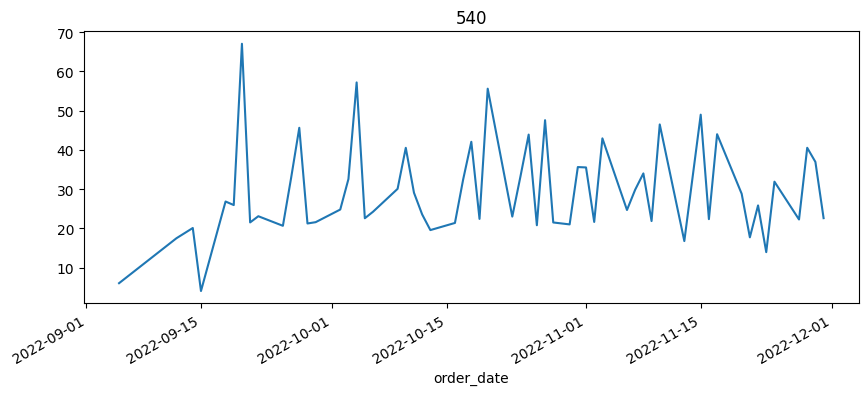

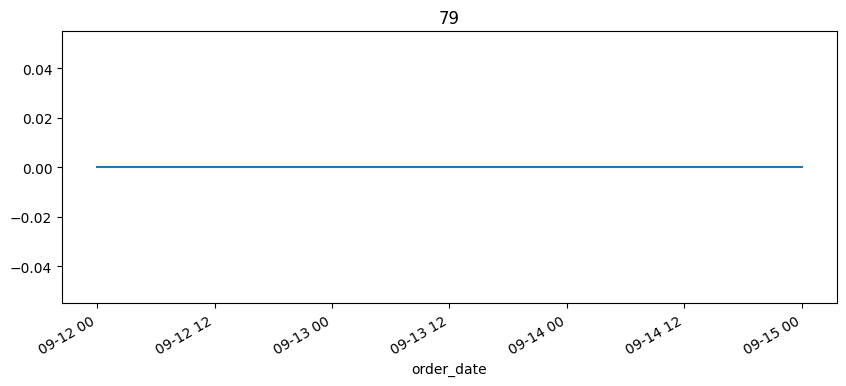

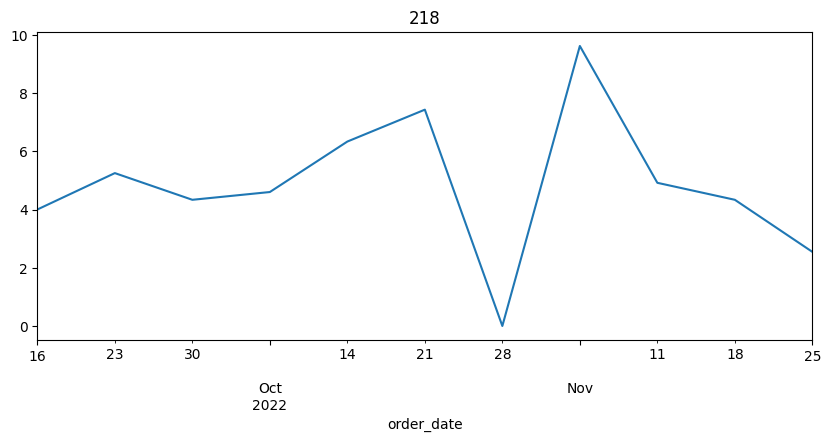

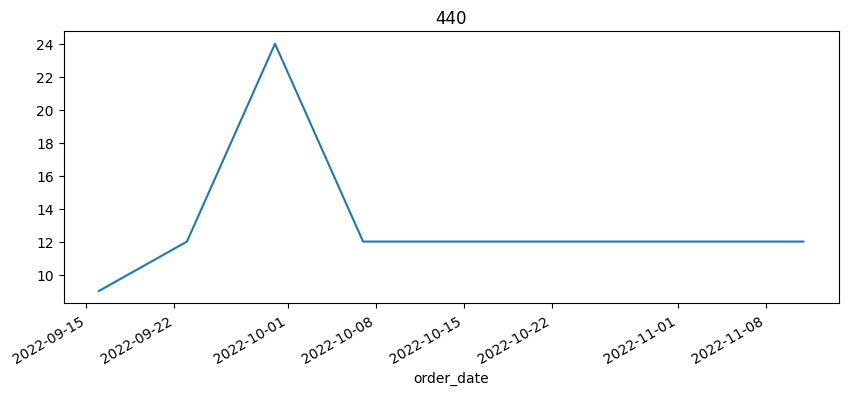

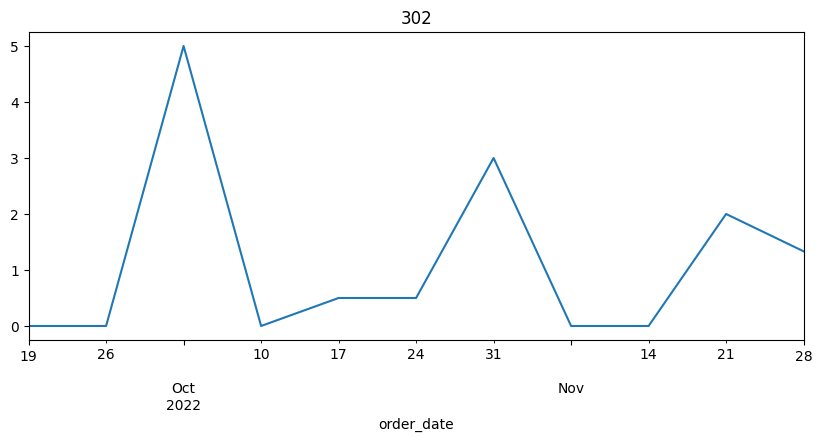

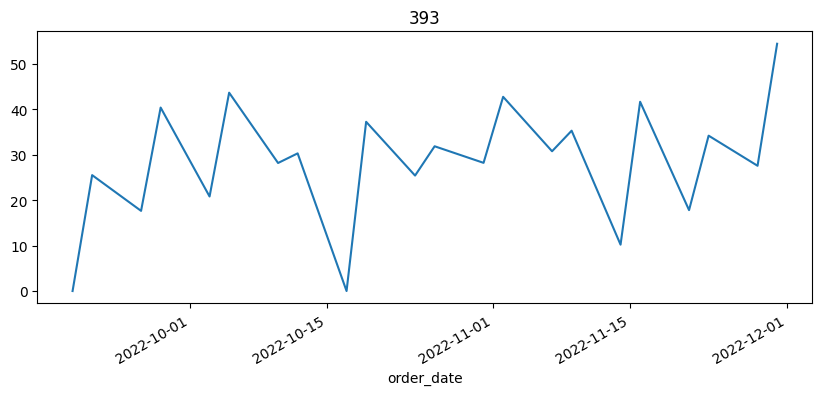

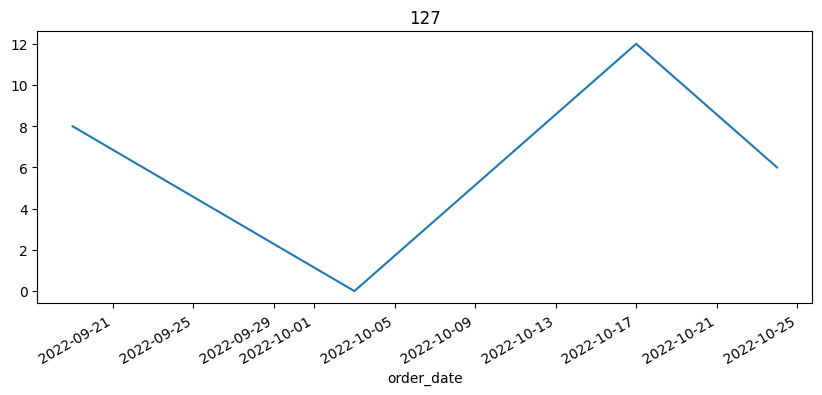

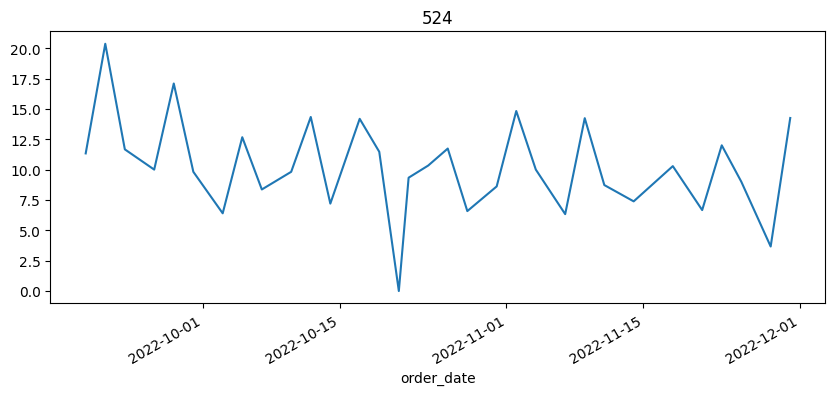

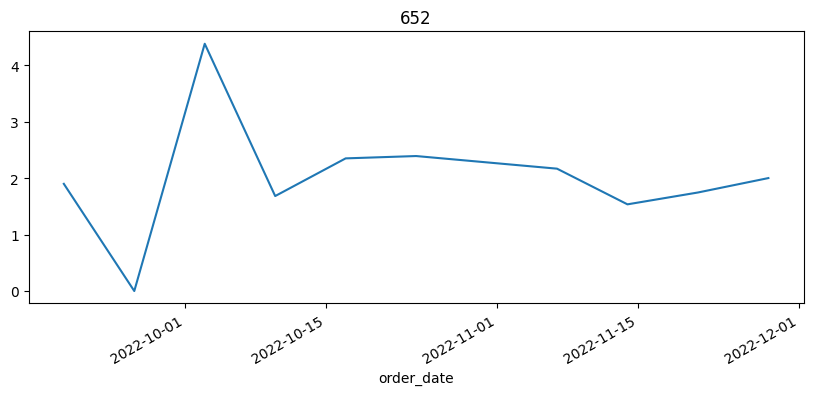

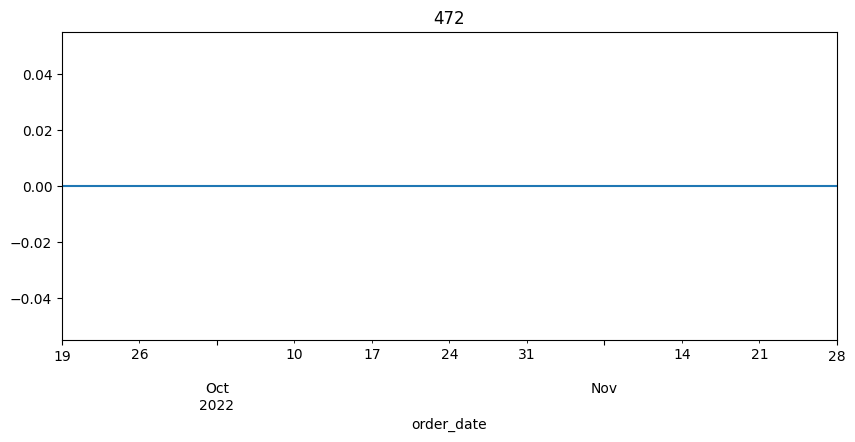

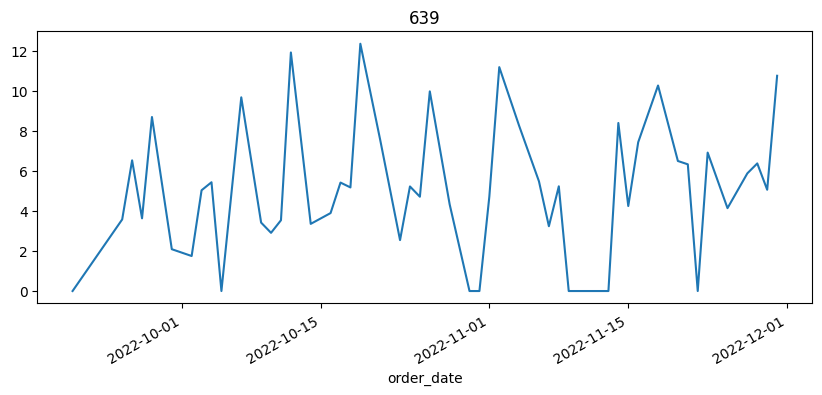

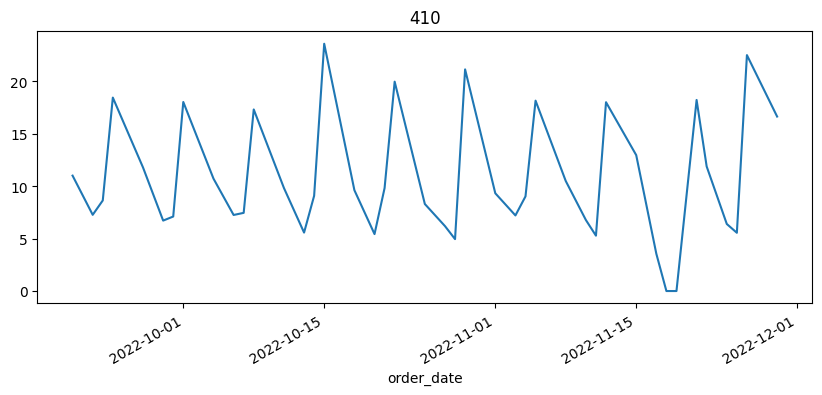

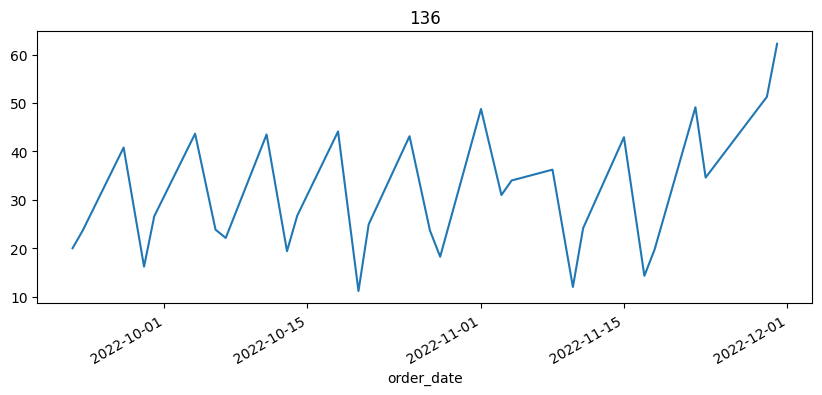

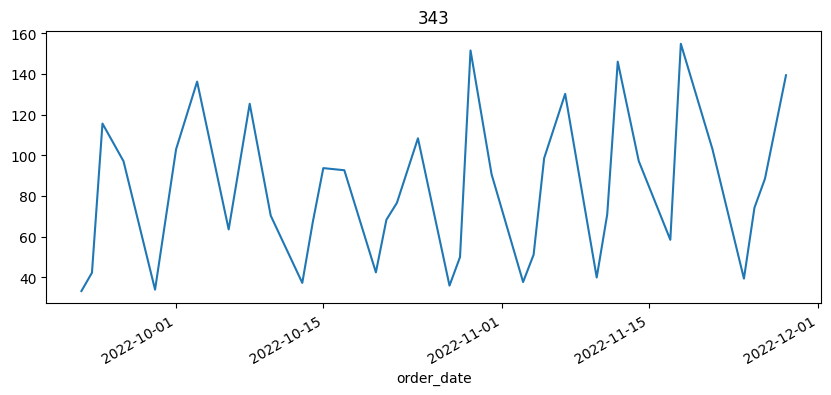

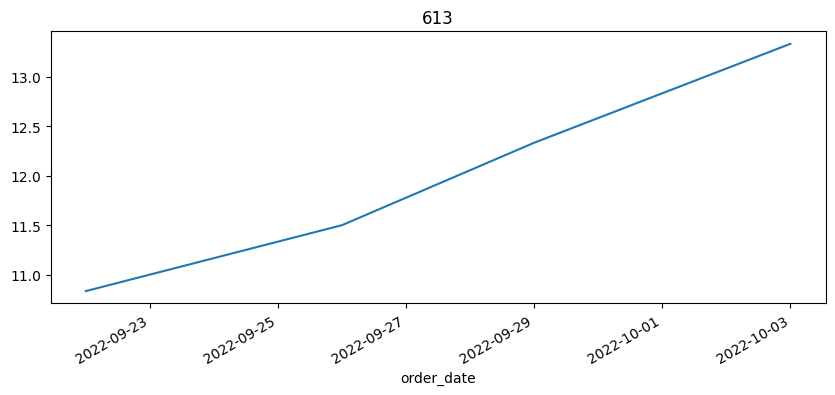

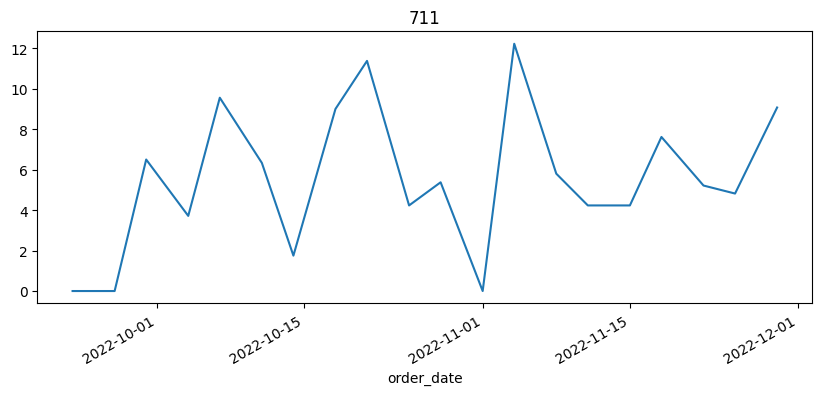

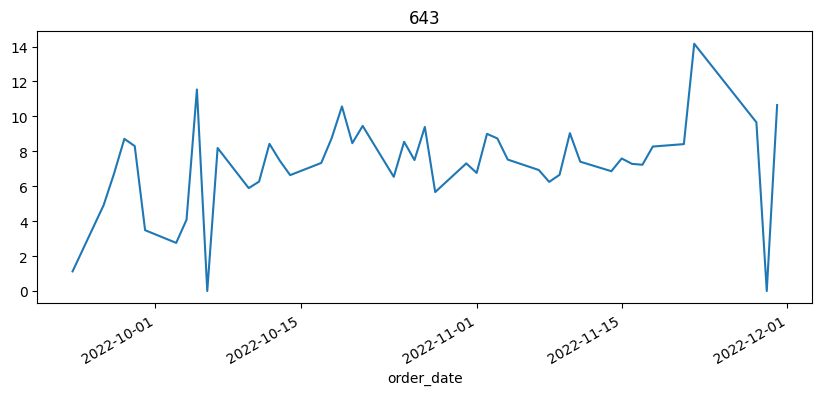

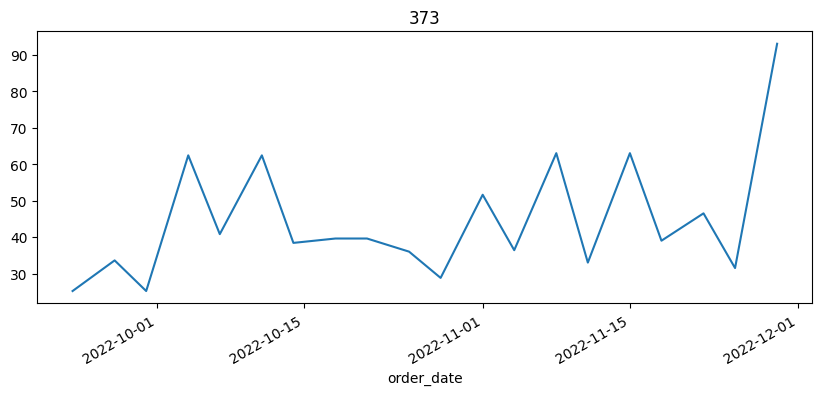

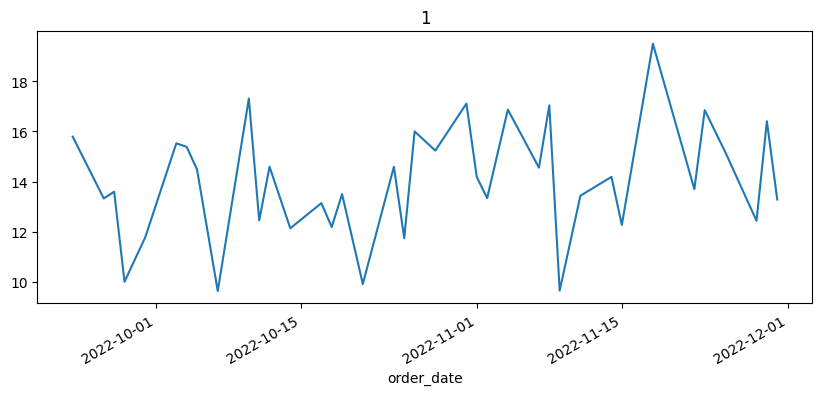

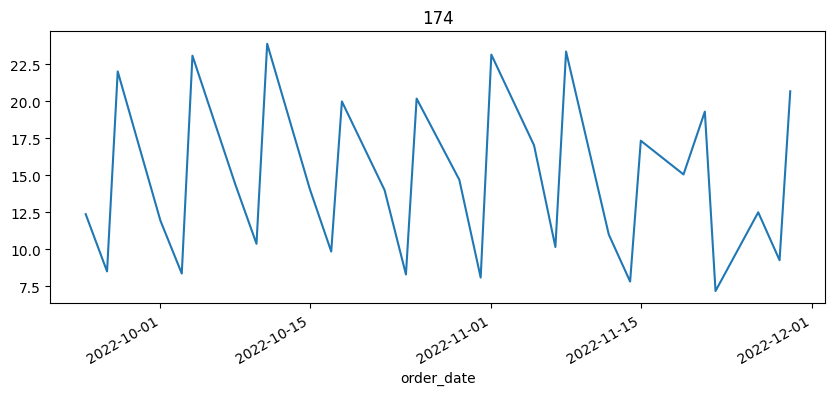

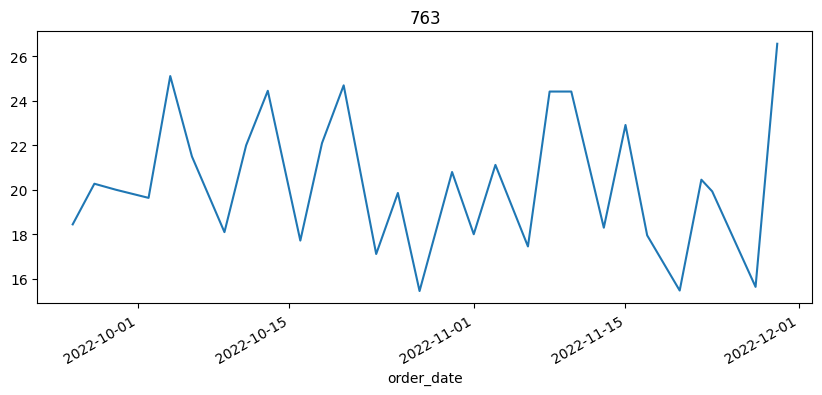

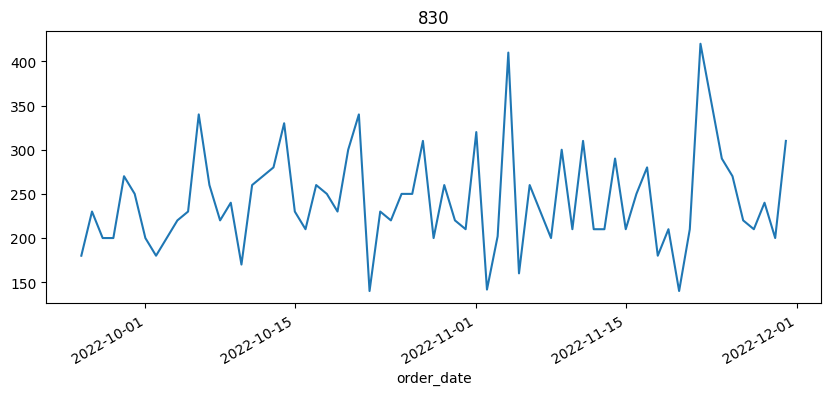

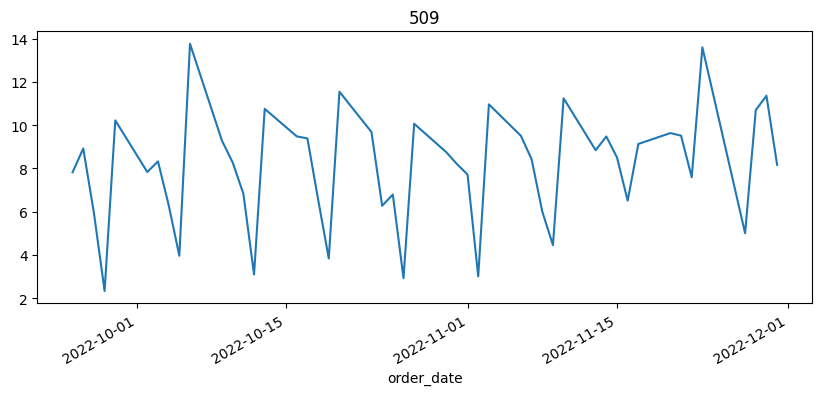

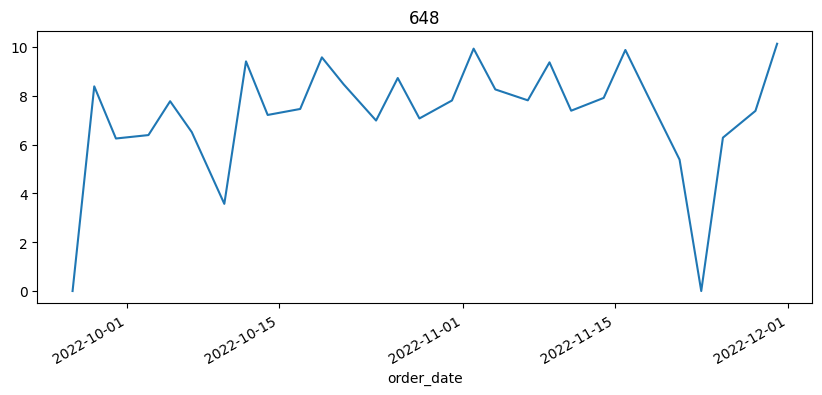

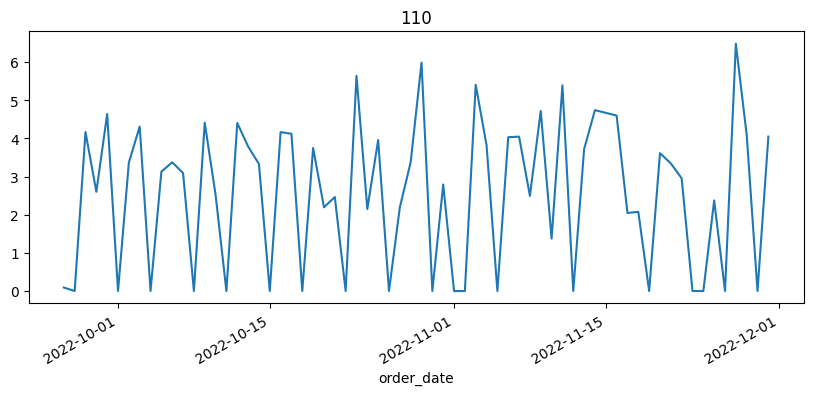

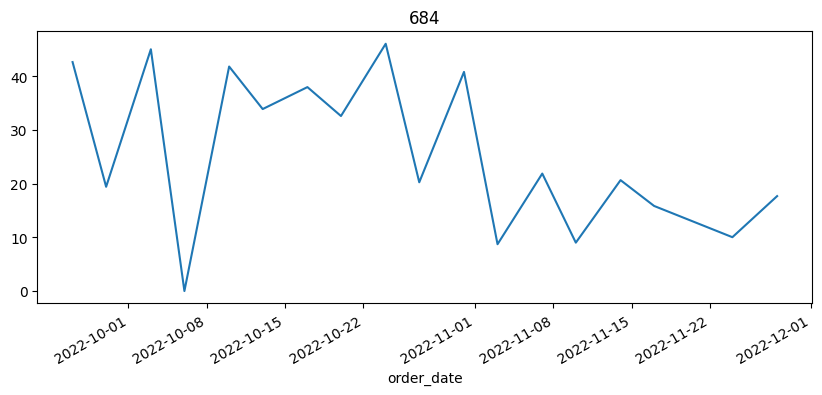

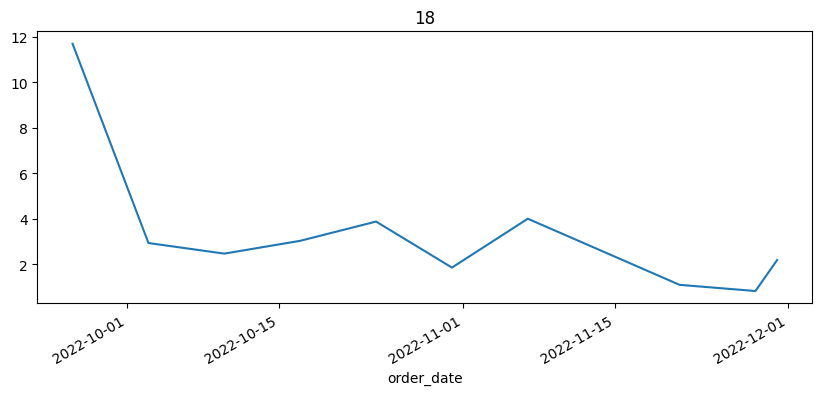

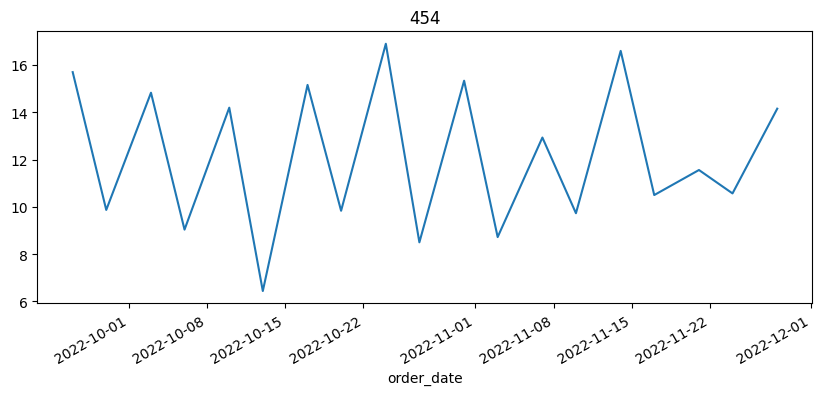

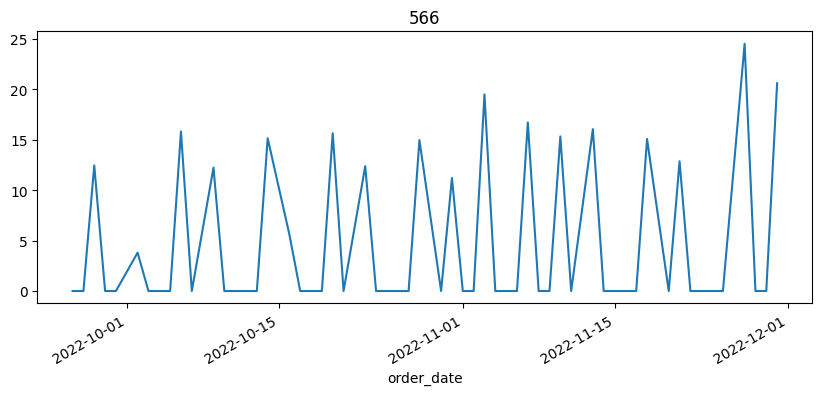

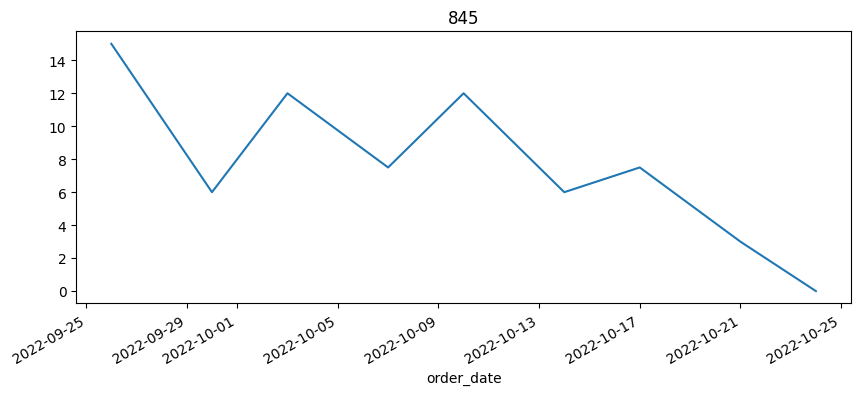

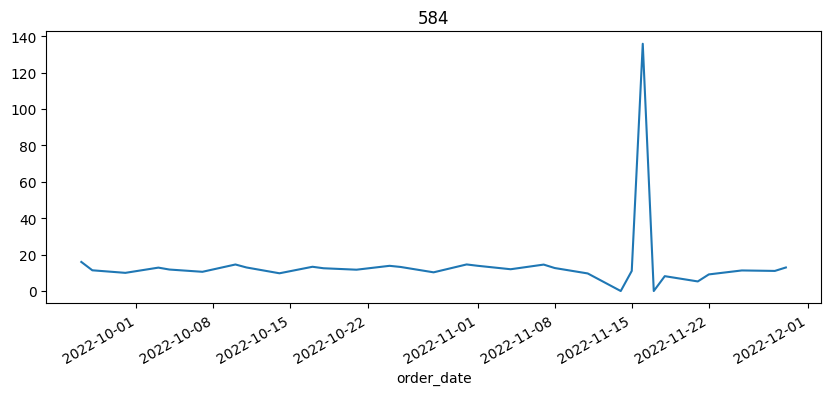

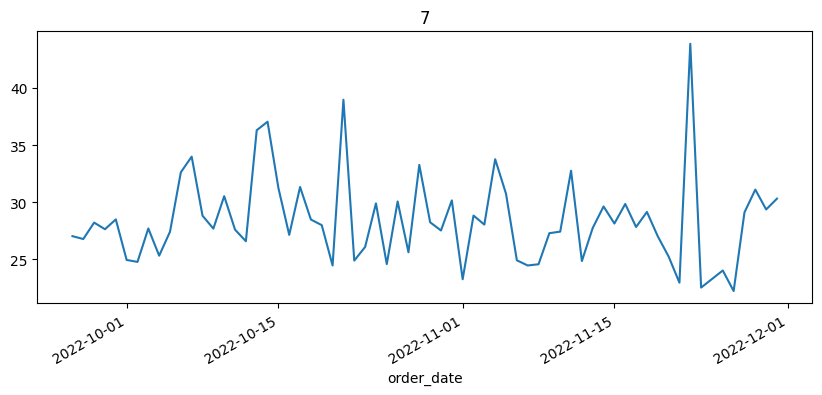

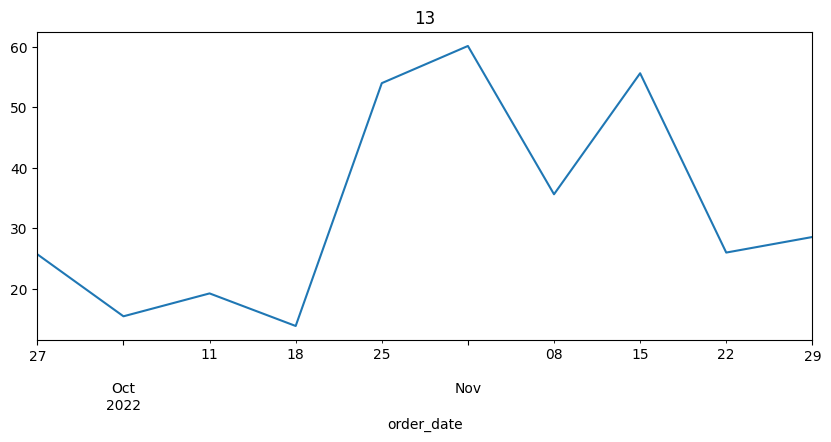

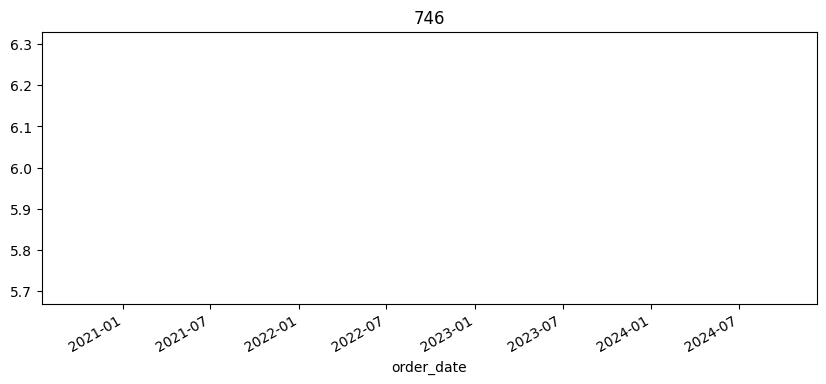

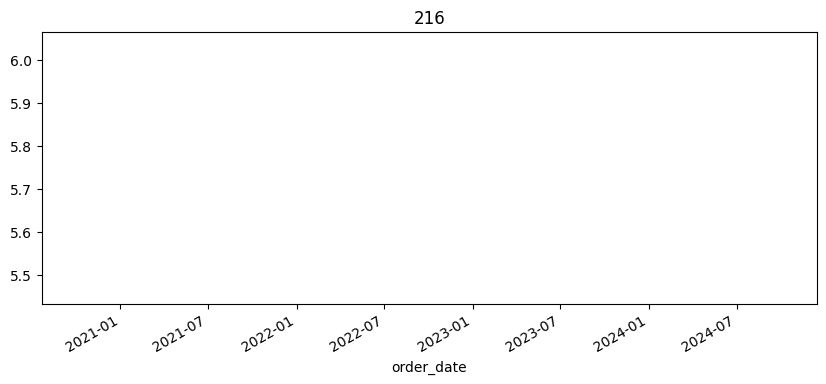

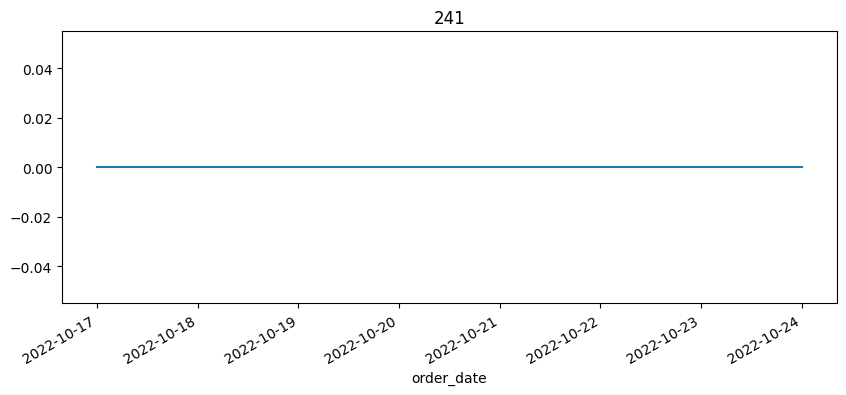

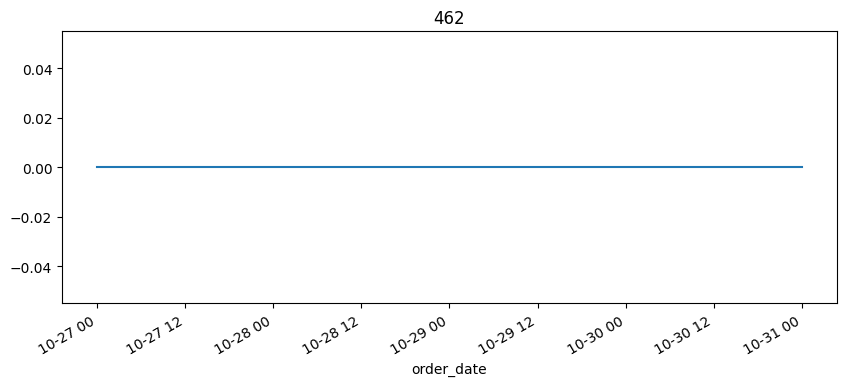

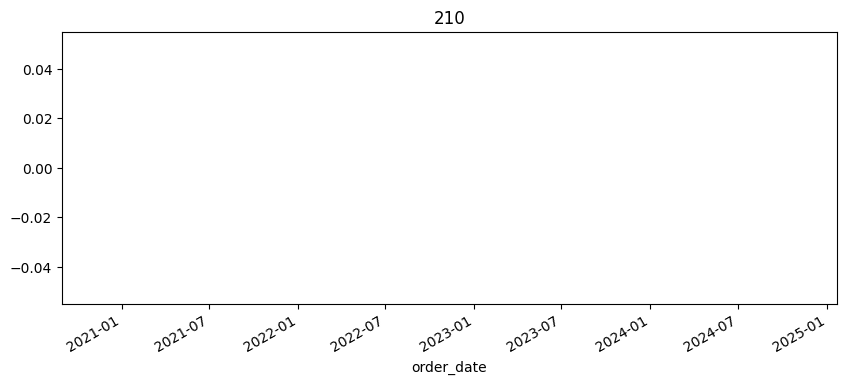

In [71]:
for i in train_s['d_id'].unique().tolist():
    (train_s[train_s['d_id'] == i]['quantity_received'].plot(figsize = (10,4),  title = i))
    
    plt.show();
    

In [75]:
train['d_id'].nunique()

38

In [76]:
train = train.sort_values(by = 'order_date')

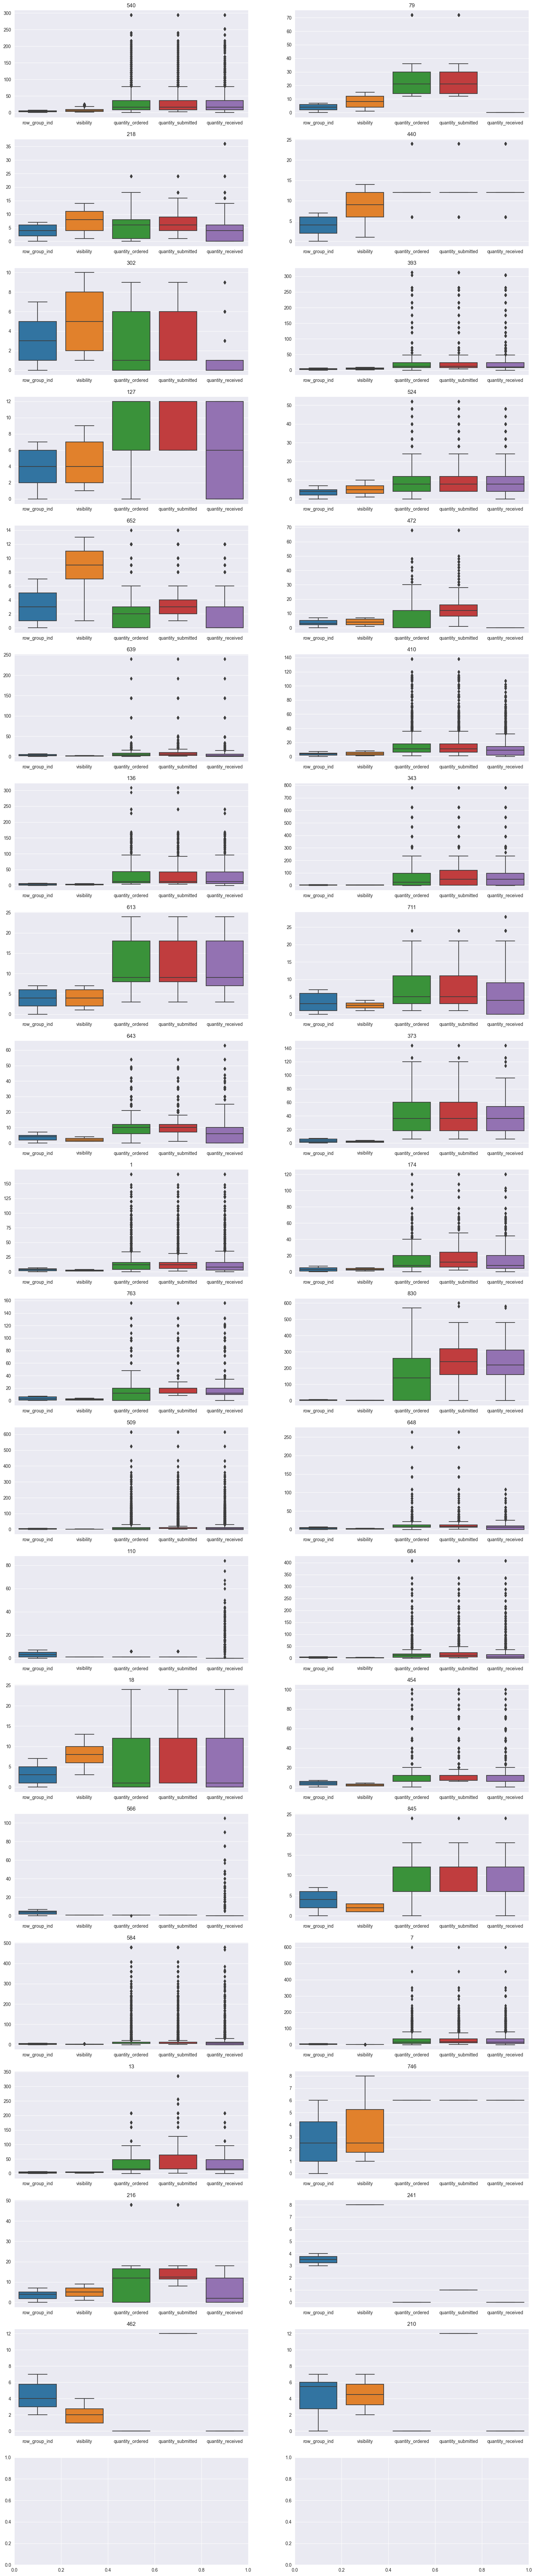

In [80]:
# looking at the boxplots before any preprocessing

sns.set_style('darkgrid')
fig, axs = plt.subplots(nrows=20, ncols=2, figsize=(20, 100))
cols = np.array([[0, 1] for i in range(20)]).reshape(-1,)
rows = np.array([np.array([0, 0])+i for i in range(20)]).reshape(-1,)

count = 0
for station in train_s['d_id'].unique().tolist():
    point = train[train['d_id'] == station]
    period_index = map(lambda x: pd.Period(x,freq='D'),point['order_date'])
    
    point.set_index(period_index,inplace=True)
    ax =axs[rows[count], cols[count]]
    sns.boxplot(point.drop(['order_id_1', 'isbn_id', 'd_id'], axis =1),ax=ax)
    ax.set_title(str(station));
    count += 1

In [83]:
# moving avg
def m_avg(stuff,window,min_period):
    "crete moving avarage from data, window,and min_period"
    moving_average = stuff.rolling( window=window,    
                                    center=True,      
                                    min_periods=min_period).mean()    
    return moving_average

c:\Users\nshre\anaconda3\envs\auto_gpt\lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\nshre\anaconda3\envs\auto_gpt\lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\nshre\anaconda3\envs\auto_gpt\lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\nshre\anaconda3\envs\auto_gpt\lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\nshre\anaconda3\envs\au

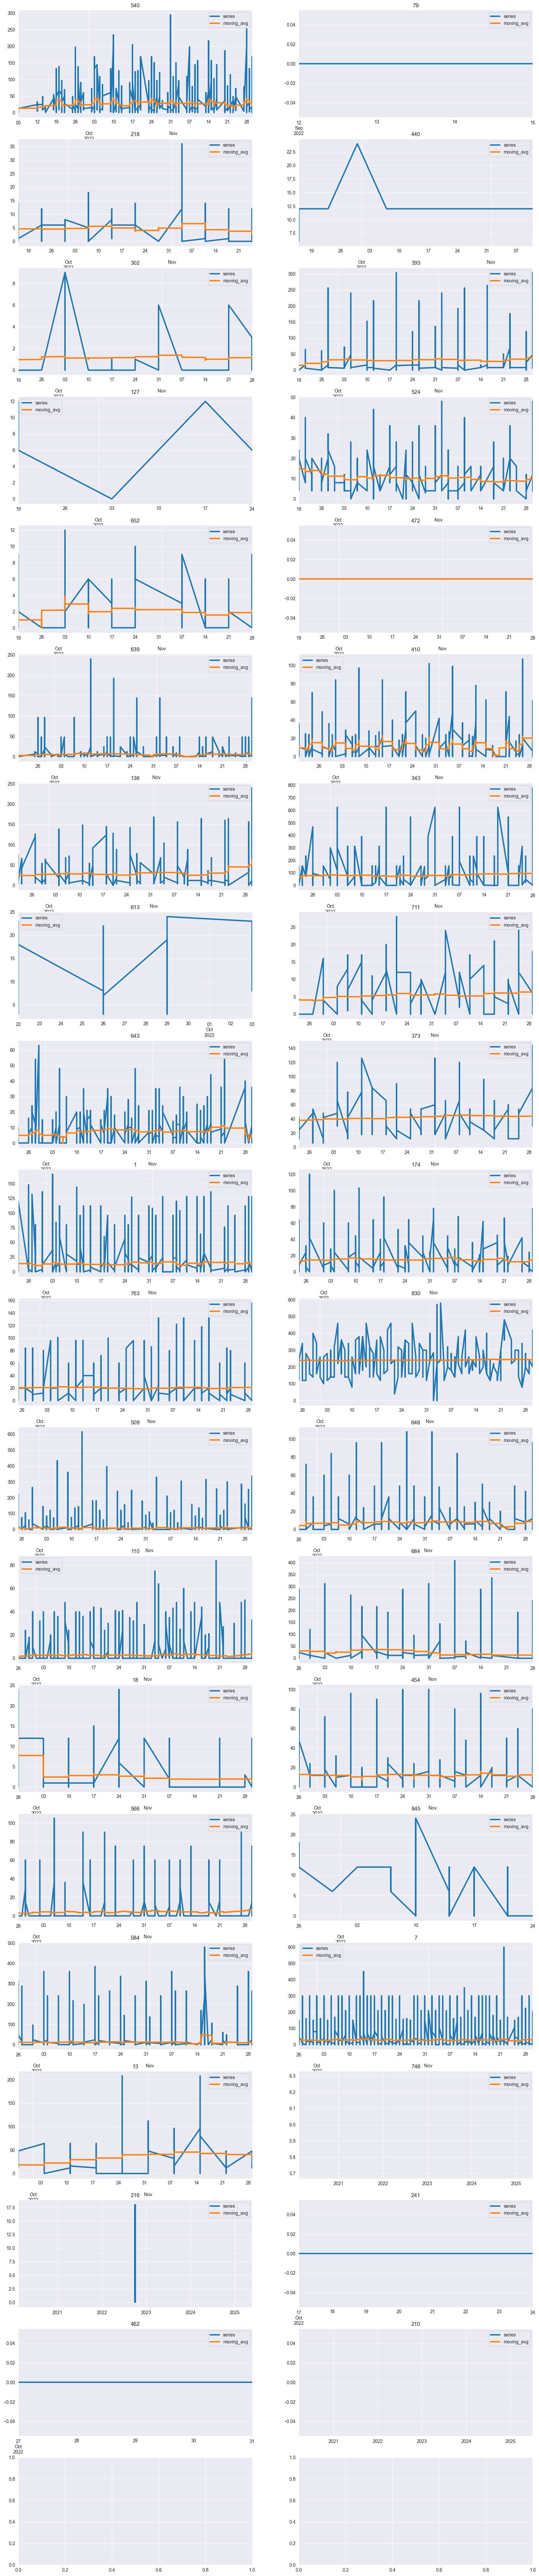

In [84]:
fig, axs = plt.subplots(nrows=20, ncols=2, figsize=(20, 100))
cols = np.array([[0, 1] for i in range(20)]).reshape(-1,)
rows = np.array([np.array([0, 0])+i for i in range(20)]).reshape(-1,)


count = 0
for station in train_s['d_id'].unique().tolist():
    point = train[train['d_id'] == station]

    period_index = map(lambda x: pd.Period(x,freq='D'),point['order_date'])
    point.set_index(period_index,inplace=True)
    ax =axs[rows[count], cols[count]]
    point['quantity_received'].plot(ax=ax, linewidth=3, title=str(station), legend=False);
    moving_average=m_avg(point['quantity_received'],365,183)
    moving_average.plot(ax=ax, linewidth=3, title="", legend=False);
    ax.legend(['series','moving_avg']);

    count += 1

plt.show();

In [54]:
train.head()

,LOCATION,d_id,isbn_id,order_id_1,order_date,evsd,row_group_ind,visibility,quantity_ordered,quantity_submitted,quantity_received
1970-01-01,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


c:\Users\nshre\anaconda3\envs\auto_gpt\lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


(<Axes: >,)

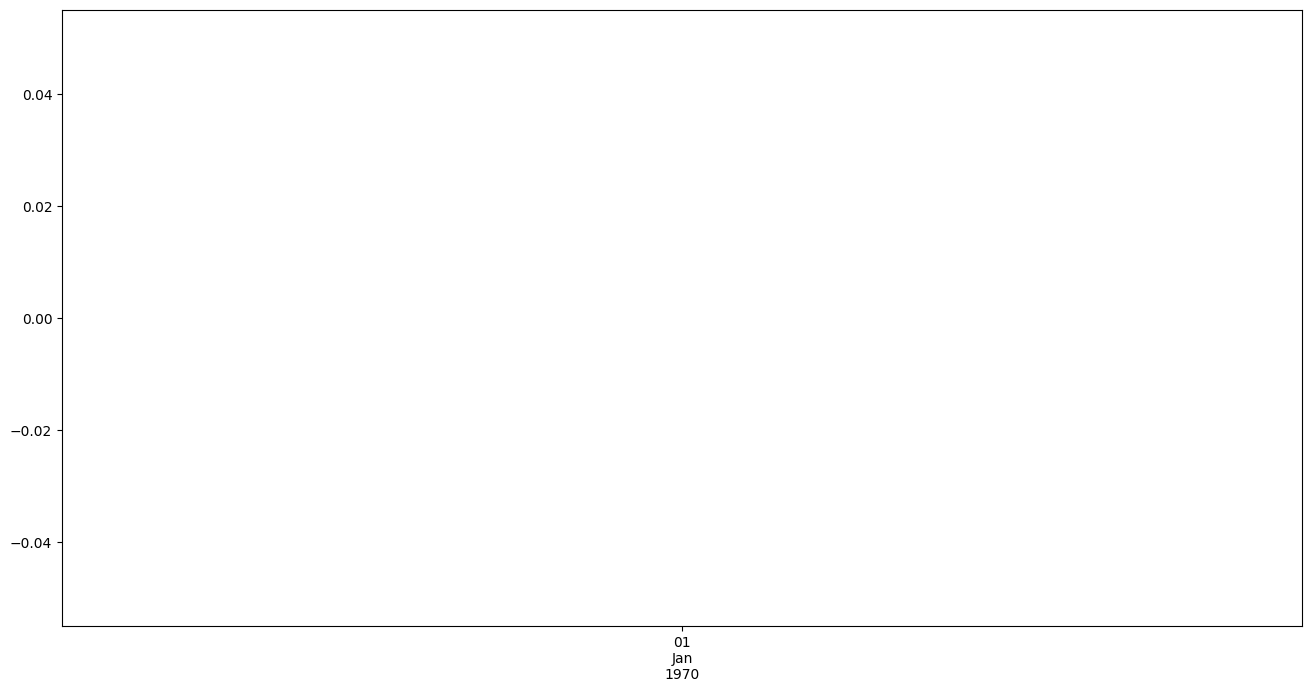

In [53]:
train.quantity_received.plot(figsize = (16,8)),